# **IEOR 4404  Simulation (Fall 2020)**

**Homework 4 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 14**

Homework 4 consists of application-oriented exercises focusing on:
* sampling a Poisson process
* basics of `simpy`

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name:
#Your UNI:

In [1]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
!pip install simpy
import simpy
!pip install pynverse
import pynverse

  Created wheel for pynverse: filename=pynverse-0.1.4.4-cp36-none-any.whl size=6350 sha256=24c5abf718d06d9c4a12febcac334cfab6471175dc4775fc496afeff141bdfce
  Stored in directory: /root/.cache/pip/wheels/80/ab/86/ec93f37613f012ba3e65c2bbd67e5c54cbc00d237574100c24
Successfully built pynverse


#Exercise 1 [20 Points]

In this exercise, we simulate different arriving processes. Generating the arrival times for different processes is extremely important when we move on to model more complicated systems.

**[In this Exercise, No loops/list comprehension are allowed]**





##Q1.  [10 points]

Assume a process follows a homogeneous Poisson process with arrival rate $\lambda =5$. 


*  Without using loop or list comprehension, simulate the arrival times for the first 300 arrivals. Report the ordered arrival times for the last 10 arrivals.
(The arrival times should be generated at once)
* From the 300 sample arrival times, compute the sample inter-arrival times. For the first arrival. The inter-arrival time is equal to the arrival time. Based on visualizing the sample distribution and theoretical distribution, show that the inter-arrival time follows an exponential distribution.



  
 
 

In [ ]:
#if a student did not use the following method but did everything correctly. [-1]

lmbda=5
#genereate inter_arrival times
inter_arrivals=-1/lmbda*np.log(np.random.rand(300))
#generate arrival times
arrivals=np.cumsum(inter_arrivals)

#[the arrival times should end around 60]
arrivals[-10:]

array([59.61591751, 59.75374243, 59.95206487, 60.00975317, 60.08514075,
       60.22289402, 60.23960266, 60.25515472, 60.49982585, 60.54771858])

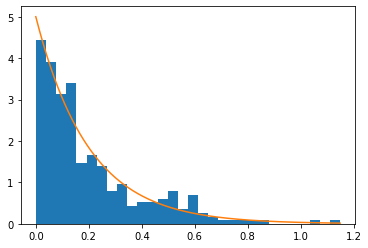

In [ ]:
#visualize  
#the inter-arrival times are random samples from Exp(5)
inter_arrivals=np.append(arrivals[0],np.diff(arrivals))
plt.hist(inter_arrivals,bins=30,density=True)
x=np.linspace(0,np.max(inter_arrivals),1000)
pdf=lmbda*np.exp(-lmbda*x)
plt.plot(x,pdf)
plt.show()

##Q2. [10 points]


Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=exp(-t^{0.5}+2t), 0\leq t<5$



* Use the **thinning method** to simulate the arrival process from $t=0$ to $5$ at the same time. The generation of the proposals and the sampling should be done based on NumPy arrays. No loops or list comprehensions are allowed in this question. [Hint: Generate the arrivals from a homogeneous process at the same time, compute the acceptance rate of all the proposed arrivals at the same time, determine acceptance/rejection  of all the proposed arrivals at the same time]

* Report the number of arrivals for the simulation.

* Plot the sample distribution of the arrival times. 


2354.1429737783815
Number of arrivals 1402


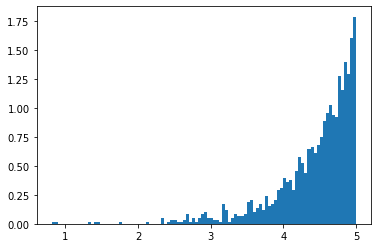

2354.1429737783815

In [ ]:
#[if loop or list comprehensions are involved in the algorithm -2 if everything is correct]
#highest lmbda
t=np.linspace(0,5,1000)
LambdaM=np.max(np.exp(-t**0.5+2*t))
print(LambdaM)
#generate arrivals using the homogeneous process
arrivals=np.random.poisson(LambdaM*5)
arrival_homo=np.sort(np.random.rand(arrivals)*5)
#acceptance rate for all the arrivals
AR=np.exp(-arrival_homo**0.5+2*arrival_homo)/LambdaM

#Boolean array to show whether each arrival is accepted (True) or not (False)
Accepted=np.random.rand(arrivals)<AR

#Use Boolean mask to get only the accepted arrivals
Arrivals=arrival_homo[Accepted]
print("Number of arrivals",len(Arrivals))
plt.hist(Arrivals,bins=100,density=True)
plt.show()

LambdaM

#Exercise 2 [45 Points]


Assume the process is a nonhomogenous Poisson process with the following arrival rate:

$\lambda(t)=50*(sin(2*\pi* t)+2)$

The unit of time is day.

$sin(t)$ is  `sympy.sin(t)` is `simpy` and `np.sin(t)` in `numpy`. 
 

##Q1. [15 points]

* Plot the arrival rate between $t=0$ and $t=5$. 

* Create a function. Inside the function, use the **thinning method** to return the arrival time of the first 500 arrivals.  

* Run the function 100 times, plot the distribution of the arrival time of the 500th customer.  


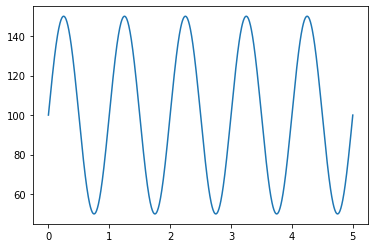

In [ ]:
t=np.linspace(0,5,1000)
arrival=50*(np.sin(2*np.pi*t)+2) 
plt.plot(t,arrival)

(array([0.17399289, 0.43498223, 0.78296802, 0.52197868, 1.13095381,
        1.65293249, 1.73992894, 1.65293249, 0.34798579, 0.26098934]),
 array([4.33199346, 4.44694068, 4.5618879 , 4.67683513, 4.79178235,
        4.90672957, 5.0216768 , 5.13662402, 5.25157124, 5.36651847,
        5.48146569]),
 <a list of 10 Patch objects>)

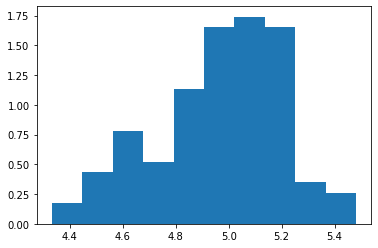

In [ ]:
Lam=np.max(arrival)

def thinning():
  arrivals=np.array([])
  i=0
  t=0
  while i<500:
    t=t-1/Lam*np.log(np.random.rand())
    if np.random.rand()<50*(np.sin(2*np.pi*t)+2) /Lam:
      arrivals=np.append(arrivals,t)
      i=i+1
  return arrivals

dist_2000=[thinning()[-1] for i in range(100)]
plt.hist(dist_2000, bins=10,density=True)

##Q2. [15 points]


* Generate the arrival time of the customers between 0 and 2 using ordered statistics method. [the inverse CDF does not have a closed-form solution. use numerical evaluation instead]
* Plot the sample distribution of the arrival times and the corresponding theoretical distribution in the same graph.

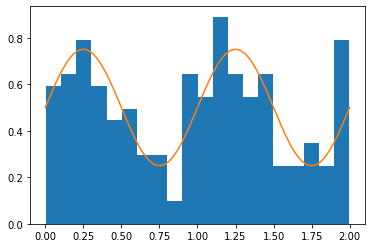

In [ ]:
t=sympy.Symbol("t")
u=sympy.Symbol("u")
E_arrival=float(sympy.integrate(50*(sympy.sin(2*sympy.pi*t)+2),(t,0,2)))
CDF=sympy.integrate(50*(sympy.sin(2*sympy.pi*t)+2)/E_arrival,(t,0,t) )
sampling=sympy.lambdify((t),CDF,"numpy")

N_arrival=np.random.poisson(E_arrival)
arrival_t=pynverse.inversefunc(sampling,np.random.rand(N_arrival), (0,2))
arrival_t=np.sort(arrival_t)

plt.hist(arrival_t,bins=20,density=True)

t=np.linspace(0,2,1000)
pdf=50*(np.sin(2*np.pi*t)+2)/E_arrival
plt.plot(t,pdf)

##Q3. [15 points]

Upon arrival, each customer will decide whether to order a product.

The willingness to pay of a customer arrived between 0 and 2 follows:

$w= 5-t+\epsilon$

where $t$ is the arrival time of this customer and $\epsilon$ is a random sample from a normal distribution with mean=0 and standard deviation=$t$. Again, $t$ is the arrival time of the customer. [In other words, later arrivals will tend to have a lower willingness to pay. Also, the uncertainty in the willingness to pay becomes higher for later arrivals.]

The product is priced at $x$ for all customers. If $w$ of a customer is higher than the price $x$, the customers will order the product for $x$. The company will generate a profit of $x-1$ from this customer. Otherwise, the customer will not order the product. The company will not generate profit from this customer. 

* Construct a function. This function returns the total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **one round of simulation**. 
* Construct a second function. Inside this function, computes the average total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **50 rounds of simulation**.
* Plot the relationship between $x$ and the average total profit from the customers arrived between 0 and 2 for $x=3, 3.1, 3.2, ..., 4.5$.

3.0 326.4
3.1 341.754
3.2 349.624
3.3000000000000003 357.05200000000013
3.4000000000000004 354.624
3.5000000000000004 361.75000000000006
3.6000000000000005 370.91600000000005
3.7000000000000006 376.6500000000001
3.8000000000000007 384.88800000000003
3.900000000000001 379.61000000000007
4.000000000000001 374.1600000000001
4.100000000000001 379.62600000000003
4.200000000000001 363.84000000000015
4.300000000000001 355.344
4.400000000000001 345.10000000000014
4.500000000000002 320.8100000000002


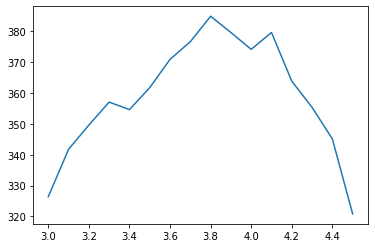

In [ ]:
def Profit_sample(x):
  N_arrival=np.random.poisson(E_arrival)
  arrival_t=pynverse.inversefunc(sampling,np.random.rand(N_arrival), (0,2))
  willingness=5-arrival_t+np.random.normal(0,arrival_t,N_arrival)
  return (x-1)*np.sum(willingness>x)
def Profit_mean(x):
  Profit_mean=np.mean([Profit_sample(x) for i in range(50)])
  print(x, Profit_mean)
  return Profit_mean
 
Profits=[Profit_mean(x) for x in np.arange(3,4.6,0.1)]

plt.plot( np.arange(3,4.6,0.1),Profits)
 

# Exercise 3 [15 Points]

Let's model the arrival of two types of customers arriving at a store. Type 1 customers arrive following a Poisson process with ($\lambda=2$). Type 2 customers arrive following a non-homogeneous Poisson process with ($\lambda=2t$).




## Q1. [15 points]
* Simulate the system using `simpy` until T=2. Print out the arrival time of each customer and which type this customer is. 
> * During the simulation, please generate the inter-arrival times one by one for each process.
> * Define the arrival of type 1 customers as Process 1
> * Define the arrival of type 2 customers as Process 2

For process 2, you can pre-generate the arrival times, then compute the inter-arrival times for `env.timeout()` in Process 2. 


In [43]:
#generate arrival times nonhomogeneous 
T=2
Lmax=2*T
Narrivals=np.random.poisson(Lmax*T)
arrival_times=np.sort(np.random.rand(Narrivals)*T)
AR=2*arrival_times/Lmax
arrival_nonhomogeneous=arrival_times[np.random.rand(Narrivals)<AR]
#generate arrival times homogeneous
Narrivals=np.random.poisson(2*T)
arrival_homogeneous=np.sort(np.random.rand(Narrivals)*T)


In [45]:
def arrival(arrival_times, process_id):
  if len(arrival_times)==0:
    return
  else:
    interarrival=np.append(arrival_times[0],np.diff(arrival_times))
  for it in interarrival:
    yield env.timeout(it)
    print("customer arrived at ", np.round(env.now,3), " from process ", process_id  )
env=simpy.Environment()
process1=env.process(arrival(arrival_homogeneous, 1))
process2= env.process(arrival(arrival_nonhomogeneous, 2))
env.run()

customer arrived at  0.196  from process  1
customer arrived at  0.298  from process  1
customer arrived at  0.841  from process  1
customer arrived at  0.9  from process  2
customer arrived at  1.09  from process  1
customer arrived at  1.182  from process  2
customer arrived at  1.789  from process  2
